In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
state_lengths = np.random.geometric(0.01, 10000)
print(np.mean(state_lengths))

100.8812


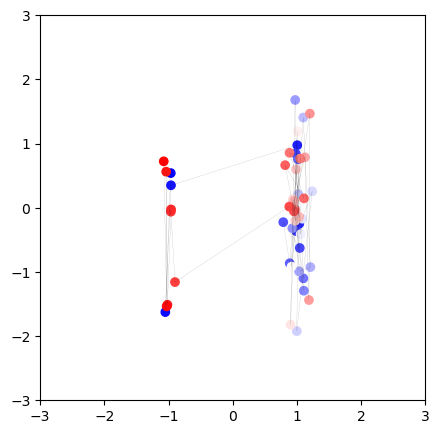

In [54]:
import numpy as np

x_means = np.array([-1.0, 1.0])
x_std = 0.1
y_std = 1.0

def get_samples(x_mean, x_std, y_std, N=1):
    mean = np.array([x_mean, 0.0])
    var = np.array([[x_std**2, 0], [0, y_std**2]])
    sample = np.random.multivariate_normal(mean, var, size=N)
    return sample

# Just for show...
cluster1 = get_samples(x_means[0], x_std, y_std, N=100)
cluster2 = get_samples(x_means[1], x_std, y_std, N=100)

def batch(x_means, x_std, y_std, transition_prob, num_samples):
    state_lengths = np.random.geometric(transition_prob, num_samples)
    sequence_length = np.cumsum(state_lengths)
    num_states = np.where(sequence_length >= num_samples)[0][0] + 1
    state_lengths = state_lengths[:num_states]
    state_lengths[-1] = num_samples - np.sum(state_lengths[:-1])
    cluster_id = (np.arange(len(state_lengths)) + 1 * (np.random.rand() > 0.5)) % 2
    sample_id = np.repeat(cluster_id, state_lengths)
    means = [np.array([x, 0]) for x in x_means]
    var = np.array([[x_std**2, 0], [0, y_std**2]])
    num_samples_each = [np.sum(state_lengths[cluster_id == i]) for i in range(2)]
    samples = [np.random.multivariate_normal(means[i].T, var, size=num_samples_each[i]) for i in range(2)]
    data = np.full((num_samples, 2), np.nan)
    data[sample_id == 0] = samples[0]
    data[sample_id == 1] = samples[1]
    return data

num_samples = 50
transition_prob = 0.1
data = batch(x_means, x_std, y_std, transition_prob, num_samples)

colormap = plt.colormaps["bwr"]
colors = colormap(np.linspace(0, 1, num_samples))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(data[:, 0], data[:, 1], linewidth=0.1, color=('k', 0.5))
ax.scatter(data[:, 0], data[:, 1], c=colors)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()


